# Data Preparation

In [2]:
import pandas as pd

In [3]:
#Load the CSV file into the data frame
datafile = 'A1data.csv' 
datafile = pd.read_csv(datafile, sep=',', decimal='.') #Read the csv file

In [4]:
#Check the types of columns
datafile.dtypes

ISO3                         object
Countries and areas          object
Region                       object
Sub-region                   object
Income Group                 object
Total                        object
Residence (Rural)            object
Residence (Urban)            object
Wealth quintile (Poorest)    object
Wealth quintile (Richest)    object
Time period                  object
dtype: object

In [5]:
#Print the 1st 2 rows of the data frame 
datafile.head(2)

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence (Rural),Residence (Urban),Wealth quintile (Poorest),Wealth quintile (Richest),Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),25%,10%,33%,1%,78%,2018-2019
1,AGO,Angola,SSA,ESA,Lower middle income (LM),19%,2%,27%,0%,62%,2015-2016


In [6]:
datafile.info() # see the infotmation of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ISO3                       90 non-null     object
 1   Countries and areas        90 non-null     object
 2   Region                     90 non-null     object
 3   Sub-region                 90 non-null     object
 4   Income Group               90 non-null     object
 5   Total                      90 non-null     object
 6   Residence (Rural)          85 non-null     object
 7   Residence (Urban)          86 non-null     object
 8   Wealth quintile (Poorest)  83 non-null     object
 9   Wealth quintile (Richest)  83 non-null     object
 10  Time period                90 non-null     object
dtypes: object(11)
memory usage: 7.9+ KB


In [7]:
# ISSUE 1: Changing data types of few columns to appropriate data types if required

In [8]:
columns_to_change = ['Total', 'Residence (Rural)', 'Residence (Urban)', 'Wealth quintile (Poorest)', 'Wealth quintile (Richest)']   

In [9]:
for col in columns_to_change: #Iterate a for loop
    datafile[col] = datafile[col].str.replace('%', '', regex=False).replace(' ', '') # Remove the '%' character
    datafile[col] = pd.to_numeric(datafile[col], errors='coerce') #substitute NaN for non-numeric values
datafile[columns_to_change] = datafile[columns_to_change].astype(float) #Convert to float data type

In [10]:
datafile.head(2) #Print the 2 rows of the data frame

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence (Rural),Residence (Urban),Wealth quintile (Poorest),Wealth quintile (Richest),Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),25.0,10.0,33.0,1.0,78.0,2018-2019
1,AGO,Angola,SSA,ESA,Lower middle income (LM),19.0,2.0,27.0,0.0,62.0,2015-2016


In [11]:
# ISSUE 2: Handling Missing values

In [12]:
#Display the missing values count in the data frame
datafile.isnull().sum()

ISO3                         0
Countries and areas          0
Region                       0
Sub-region                   0
Income Group                 0
Total                        0
Residence (Rural)            5
Residence (Urban)            4
Wealth quintile (Poorest)    7
Wealth quintile (Richest)    7
Time period                  0
dtype: int64

In [13]:
columns_fill = ["Residence (Rural)", "Residence (Urban)", "Wealth quintile (Poorest)", "Wealth quintile (Richest)"] 
mean_of_col = datafile[columns_fill].mean() #Calculate the mean of the columns
datafile[columns_fill] = datafile[columns_fill].fillna(mean_of_col) # fill with the mean values 

In [14]:
datafile.head() #Print the 1st few rows of the data frame

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence (Rural),Residence (Urban),Wealth quintile (Poorest),Wealth quintile (Richest),Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),25.0,10.000000,33.000000,1.000000,78.000000,2018-2019
1,AGO,Angola,SSA,ESA,Lower middle income (LM),19.0,2.000000,27.000000,0.000000,62.000000,2015-2016
2,ARG,Argentina,LAC,LAC,Upper middle income (UM),43.0,26.388235,44.151163,17.915663,62.204819,2011-2012
3,ARM,Armenia,ECA,EECA,Upper middle income (UM),81.0,71.000000,89.000000,44.000000,99.000000,2015-2016
4,BGD,Bangladesh,SA,SA,Lower middle income (LM),34.0,31.000000,48.000000,8.000000,73.000000,2019


In [15]:
# Issue 3: Standardizing a column for consistency

In [16]:
# Standardize the TimePeriod column
datafile['Start Period'] = datafile['Time period'].str.split('-').str[0].astype(int) # Split the 'Time period' column on the '-' character and take the first part (i.e., the start period)
datafile['End Period'] = datafile['Time period'].str.split('-').str[1].fillna(datafile['Start Period']).astype(int) #Split the 'Time period' column on the '-' character and take the second part (i.e., the end period

In [17]:
datafile.head(2) #Print the 1st 2 rows of the data frame

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence (Rural),Residence (Urban),Wealth quintile (Poorest),Wealth quintile (Richest),Time period,Start Period,End Period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),25.0,10.0,33.0,1.0,78.0,2018-2019,2018,2019
1,AGO,Angola,SSA,ESA,Lower middle income (LM),19.0,2.0,27.0,0.0,62.0,2015-2016,2015,2016


In [18]:
# Issue 4: Identifying and Removing Extra columns which are not necessary

In [19]:
datafile.drop(columns=['Time period']) #Time Period column is no more needed as we have start period and end period columns

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence (Rural),Residence (Urban),Wealth quintile (Poorest),Wealth quintile (Richest),Start Period,End Period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),25.0,10.000000,33.000000,1.000000,78.000000,2018,2019
1,AGO,Angola,SSA,ESA,Lower middle income (LM),19.0,2.000000,27.000000,0.000000,62.000000,2015,2016
2,ARG,Argentina,LAC,LAC,Upper middle income (UM),43.0,26.388235,44.151163,17.915663,62.204819,2011,2012
3,ARM,Armenia,ECA,EECA,Upper middle income (UM),81.0,71.000000,89.000000,44.000000,99.000000,2015,2016
4,BGD,Bangladesh,SA,SA,Lower middle income (LM),34.0,31.000000,48.000000,8.000000,73.000000,2019,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
85,URY,Uruguay,LAC,LAC,High income (H),66.0,46.000000,68.000000,28.000000,66.000000,2012,2099
86,UZB,Uzbekistan,ECA,EECA,Lower middle income (LM),18.0,14.000000,31.000000,1.000000,70.000000,2017,2017
87,VNM,Viet Nam,EAP,EAP,Lower middle income (LMM),45.0,17.000000,62.000000,11.000000,82.000000,2012,2012
88,ZMB,Zambia,SSA,ESA,Lower middle income (LM),8.0,2.000000,16.000000,0.000000,31.000000,2018,2019


In [20]:
# Issue 5: Check for Duplicates

In [21]:
datafile.duplicated().sum() # Calculate the sum of the duplicate rows in the dataset

3

In [22]:
datafile.drop_duplicates(inplace=True) # Drop the duplicated rows

In [23]:
datafile.duplicated().sum()

0

In [24]:
datafile.info() # see the infotmation of the dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 0 to 89
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ISO3                       87 non-null     object 
 1   Countries and areas        87 non-null     object 
 2   Region                     87 non-null     object 
 3   Sub-region                 87 non-null     object 
 4   Income Group               87 non-null     object 
 5   Total                      87 non-null     float64
 6   Residence (Rural)          87 non-null     float64
 7   Residence (Urban)          87 non-null     float64
 8   Wealth quintile (Poorest)  87 non-null     float64
 9   Wealth quintile (Richest)  87 non-null     float64
 10  Time period                87 non-null     object 
 11  Start Period               87 non-null     int32  
 12  End Period                 87 non-null     int32  
dtypes: float64(5), int32(2), object(6)
memory usage: 8.8+ KB


In [25]:
cleaned_file = 'updated-A1data.csv' # path of cleaned file

In [26]:
#Read the CSV file
datafile.to_csv(cleaned_file, index=False)

# Data Exploration

In [28]:
datafile= pd.read_csv(cleaned_file)

In [29]:
import matplotlib.pyplot as plt #importing pyplot from matplotlib libraries to create visualizations

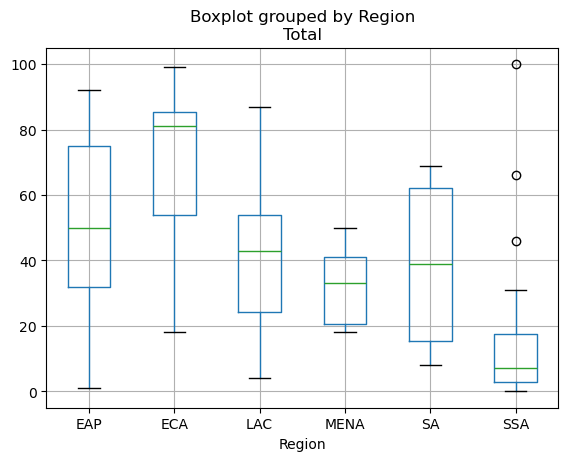

In [30]:
# Creating a boxplot
datafile.boxplot(column='Total',by='Region')
plt.show()

In [31]:
median_of_each_region = datafile.groupby('Region')['Total'].median() # calculating the median of each region grouping by column "Total"
print("Median:")
print(median_of_each_region)

Median:
Region
EAP     50.0
ECA     81.0
LAC     43.0
MENA    33.0
SA      39.0
SSA      7.0
Name: Total, dtype: float64


In [32]:
mean_poorest = datafile['Wealth quintile (Poorest)'].mean() #calculating the mean Wealth quintile (Poorest)
mean_richest = datafile['Wealth quintile (Richest)'].mean() #calculating the mean Wealth quintile (Richest)

In [33]:
print(f"Mean for Wealth quintile (Poorest): {mean_poorest:.2f}")
print(f"Mean for Wealth quintile (Richest): {mean_richest:.2f}")

Mean for Wealth quintile (Poorest): 18.53
Mean for Wealth quintile (Richest): 61.99
